# Hydrogen Wavefunctions - Electron Probability Density Plots

This Notebook is aimed at the Modeling and visualization of solutions for the hydrogen atom wavefunction and electron probability density plots by solving The Schrodinger Equation in Spherical Coordinates

The Time-dependent Schrodinger Equation is given by the following formula:

$$
i \hbar \frac{\partial}{\partial t}|\psi(t)\rangle=\hat{H}|\psi(t)\rangle
$$

Concerning ourselves with the time-independent form and by expanding the Hamiltonian Operator we get the following:

$$
\left(-\frac{\hbar^2}{2 m} \nabla^2+V\right) \psi=E \psi
$$

Expandig the Laplacian in Spherical Coordinates, The Schrodinger Equation becomes:

$$
-\frac{\hbar^2}{2 m}\left[\frac{1}{r^2} \frac{\partial}{\partial r}\left(r^2 \frac{\partial}{\partial r}\right)+\frac{1}{r^2 \sin \theta} \frac{\partial}{\partial \theta}\left(\sin \theta \frac{\partial}{\partial \theta}\right)+\frac{1}{r^2 \sin ^2 \theta} \frac{\partial^2}{\partial \phi^2}\right] \psi+V(r) \psi=E \psi
$$

Luckily, this complex equation is indeed seperable to radial & spherical components and solutions to it admit the following form:

$$
\psi(r, \theta, \phi)=R(r) Y(\theta, \phi)
$$

In [265]:
#importing Dependencies and displaying versions
import scipy, scipy.special as sp
import seaborn as sns
import matplotlib, matplotlib.pyplot as plt
import numpy as np

print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)
print('NumPy', np.__version__)
print('SciPy', scipy.__version__)

Matplotlib 3.7.2
Seaborn 0.12.2
NumPy 1.23.3
SciPy 1.9.1


In [266]:
# Set custom matplotlib default font
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

## The Radial Equation

The Radial equation is related to the Associated Laguerre Equation, for which the Associated Laguerre functions are solutions.

The Associated Laguerre Equation is given by:

\begin{equation}
x L_j^{k^{\prime \prime}}(x)+(1-x+k) L_j^{k^{\prime}}(x)+j L_j^k(x)=0
\end{equation}

The solutions to this equation is the Associated Laguerre functions. The first few of them are calculated and tabulated below:

\begin{equation}
\begin{array}{ll}
L_0^0(x)=L_0(x) & L_0^2(x)=2 \\
L_1^0(x)=L_1(x) & L_3^0(x)=L_3(x) \\
L_1^1(x)=-2 x+4 & L_3^1(x)=-4 x^3+48 x^2-144 x+96 \\
L_0^1(x)=1 & L_2^3(x)=60 x^2-600 x+1200 \\
L_2^0(x)=L_2(x) & L_3^3(x)=-120 x^3+2160 x^2-10800 x+14400 \\
L_2^1(x)=3 x^2-18 x+18 & L_3^2(x)=-20 x^3+300 x^2-1200 x+1200 \\
L_2^2(x)=12 x^2-96 x+144 & L_1^3(x)=-24 x+96 \\
L_1^2(x)=-6 x+18 & L_0^3(x)=6
\end{array}
\end{equation}

For any given j or k, the Laguerre function can be obtained by its generating function:

\begin{equation}
L_j^k(x)=(-1)^k \frac{d^k}{d x^k} L_{j+k}(x)
\end{equation}

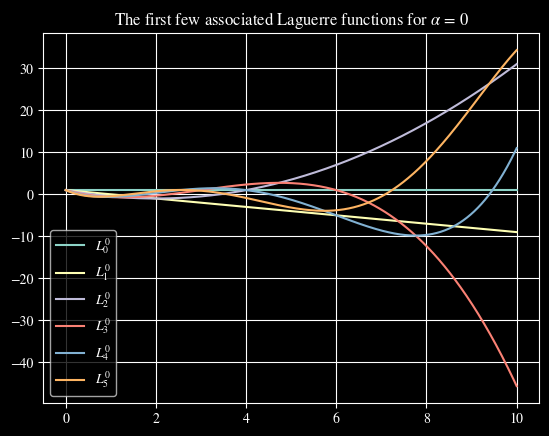

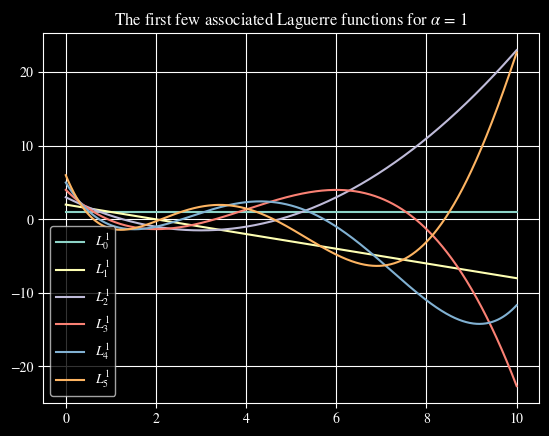

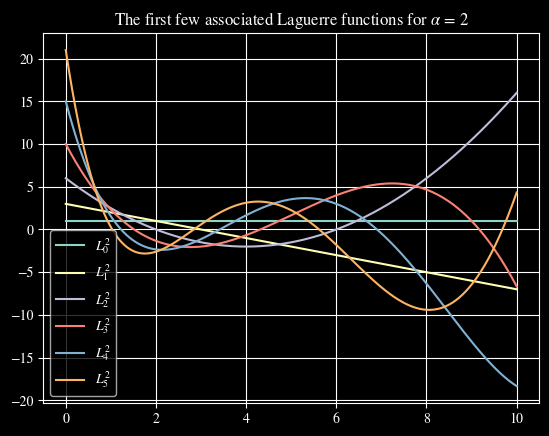

In [268]:
# The Generalized (associated) Laguerre polynomial.
num_lg = 6
alpha_max = 3
dom_lg = np.linspace(0,10,1000)

plt.style.use("dark_background")

for i in range(alpha_max):
    plt.figure()
    for j in range(num_lg):
        laguerre = sp.genlaguerre(j, i)
        plt.plot(dom_lg,laguerre(dom_lg), label = rf'$L_{j}^{i}$')

    plt.title(r'The first few associated Laguerre functions for ${\alpha}$ = ' + str(i))
    plt.legend()
    plt.grid()
    plt.show()

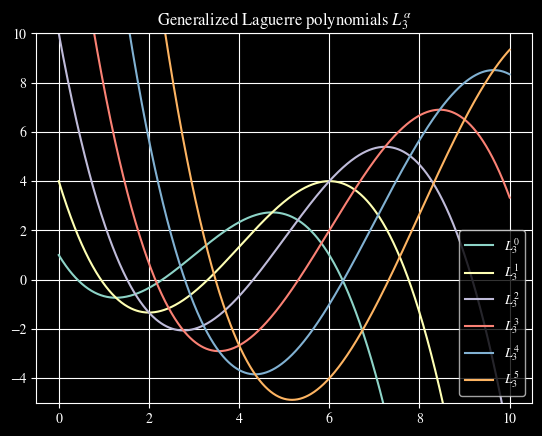

In [269]:
#Generalized (associated) Laguerre polynomial for n = 3
alpha_rng = 6

plt.figure()

for i in range(alpha_rng):
    laguerre = sp.genlaguerre(3, i)
    plt.plot(dom_lg,laguerre(dom_lg), label = rf'$L_{3}^{i}$')

plt.ylim(-5, 10)
plt.title(r'Generalized Laguerre polynomials $L_3^{\alpha}$')
plt.legend()
plt.grid()
plt.show()

The Normalized Radial wavefunctions, solved for a Coloumb potential are:

\begin{equation}
R_{n, l}(r)=\sqrt{\left(\frac{2}{n a_0}\right)^3 \frac{(n-l-1) !}{2 n[(n+l) !]^3}} e^{-r / n a_0}\left(\frac{2 r}{n a_0}\right)^l L_{n-l-1}^{2 l+1}\left(\frac{2 r}{n a_0}\right)
\end{equation}

The first few are tabulated below:

\begin{equation}
\begin{aligned}
& R_{1,0}(r)=2 a_0^{-3 / 2} e^{-r / a_0} \\
& R_{2,0}(r)=\frac{1}{\sqrt{2}} a_0^{-3 / 2}\left(1-\frac{r}{2 a_0}\right) e^{-r / 2 a_0} \\
& R_{2,1}(r)=\frac{1}{\sqrt{24}} a_0^{-3 / 2} \frac{r}{a_0} e^{-r / 2 a_0} \\
& R_{3,0}(r)=\frac{2}{\sqrt{27}} a_0^{-3 / 2}\left(1-\frac{2 r}{3 a_0}+\frac{2 r^2}{27 a_0^2}\right) e^{-r / 3 a_0} \\
& R_{3,1}(r)=\frac{8}{27 \sqrt{6}} a_0^{-3 / 2}\left(1-\frac{r}{6 a_0}\right) \frac{r}{a_0} e^{-r / 3 a_0} \\
& R_{3,2}(r)=\frac{4}{81 \sqrt{30}} a_0^{-3 / 2} \frac{r^2}{a_0^2} e^{-r / 3 a_0}
\end{aligned}
\end{equation}

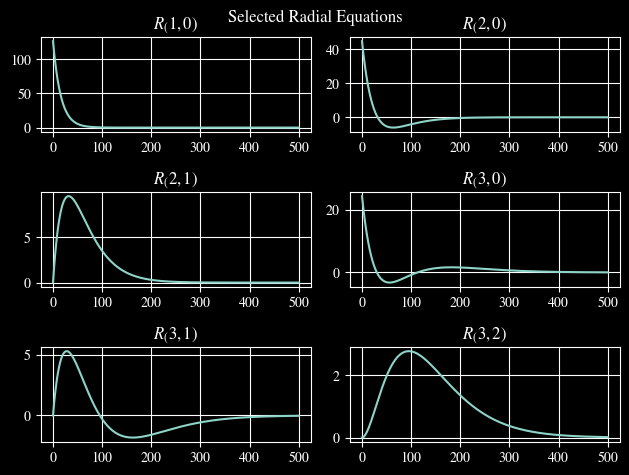

In [270]:
#Visualizing The Radial Equation

qu_num = [[1,0],[2,0],[2,1],[3,0],[3,1],[3,2]] #selected quantum numbers for visualization, qu_num[n,l]

r_viz = np.linspace(0,500,1000) 

fig, ax = plt.subplots(3, 2)

for i in range(6):
    #Evaluating the Radial Equation
    p = 2 * r_viz / (qu_num[i][0] * a0)
    laguerre = sp.genlaguerre(qu_num[i][0] - qu_num[i][1] - 1, 2 * qu_num[i][1] + 1)
    radial_vals = np.sqrt(
    ((2 / qu_num[i][0] * a0) ** 3 * (np.math.factorial(qu_num[i][0] - qu_num[i][1] - 1))) / (2 * qu_num[i][0] * (np.math.factorial(qu_num[i][0] + qu_num[i][1])))
    ) * np.exp(-p / 2) * (p ** qu_num[i][1]) * laguerre(p)

    plt.subplot(3,2,i+1)
    plt.plot(r_viz,(radial_vals))
    #plt.ylim(-10, 10)
    plt.title(rf'$R_{qu_num[i][0],qu_num[i][1]}$')
    plt.grid()

fig.tight_layout()
plt.suptitle("Selected Radial Equations")
plt.show()

In [271]:
#Defining The Normalized Radial Equation Function

def radial_function(n, l, r, a0):
    laguerre = sp.genlaguerre(n - l - 1, 2 * l + 1)
    p = 2 * r / (n * a0)

    return np.sqrt(
        ((2 / n * a0) ** 3 * (np.math.factorial(n - l - 1))) / (2 * n * (np.math.factorial(n + l)))
    ) * np.exp(-p / 2) * (p ** l) * laguerre(p)

## The Angular Equation

The solutions to the angular equation are The Spherical Harmonic Functions, which are also seperable and it admits the following form:

\begin{equation}
Y_{l, m}(\theta, \phi)=f_{l, m}(\theta) g_m(\phi)
\end{equation}

The Solution to the Azimuthal component is given by:

\begin{equation}
g(\phi)=e^{i m \phi} \Rightarrow g_m(\phi)=e^{i m \phi}
\end{equation}

The polar component is The Associated Legendre Equation:

\begin{equation}
\left(1-x^2\right) f^{\prime \prime}(x)-2 x f^{\prime}(x)+l(l+1) f(x)-\frac{m^2}{1-x^2} f(x)=0
\end{equation}

Solutions to The Associated Legendre Equation are the Associated Legendre Polynomials. The first few of them are calculated and tabulated below:

\begin{equation}
\begin{array}{ll}
P_{0,0}(x)=1 & P_{2,0}(x)=\frac{1}{2}\left(3 x^2-1\right) \\
P_{1,1}(x)=-\sqrt{1-x^2} & P_{3,3}(x)=-15\left(\sqrt{1-x^2}\right)^3 \\
P_{1,0}(x)=x & P_{3,2}(x)=15 x\left(1-x^2\right) \\
P_{2,2}(x)=3\left(1-x^2\right) & P_{3,1}(x)=-\frac{3}{2}\left(5 x^2-1\right) \sqrt{1-x^2} \\
P_{2,1}(x)=-3 x \sqrt{1-x^2} & P_{3,0}(x)=\frac{1}{2}\left(5 x^3-3 x\right)
\end{array}
\end{equation}

for any l and m, the Legendre polynomial is given by its generating function:

\begin{equation}
P_{l, m}(x)=(-1)^m \sqrt{\left(1-x^2\right)^m} \frac{d^m}{d x^m} P_l(x)
\end{equation}

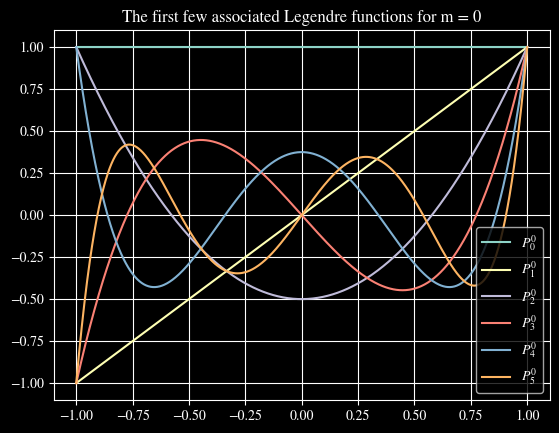

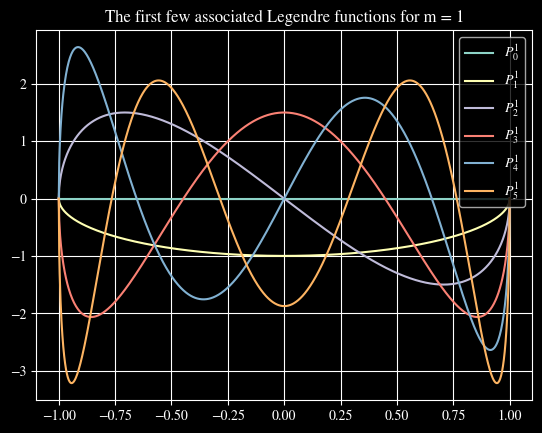

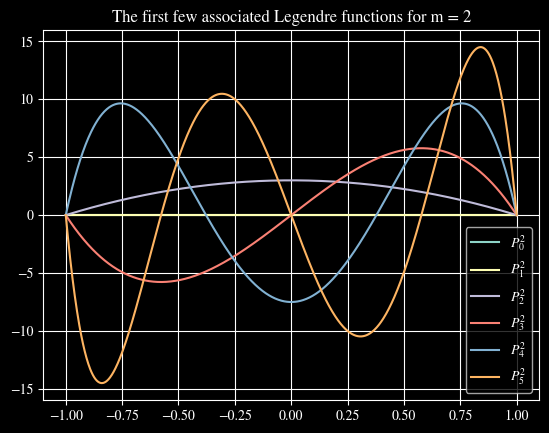

In [272]:
# The Associated Legendre function of integer order and real degree.
num_ln = 6 #number of polynomials to be displayed
dom_ln = np.linspace(-1, 1, 1000) #domain of orthognality for the Associated Legendre Polynomials 
m_max = 3

for i in range(m_max):
    plt.figure()
    for j in range(num_ln):
        legendre = sp.lpmv(i, j, dom_ln)
        plt.plot(dom_ln,legendre, label = rf'$P_{j}^{i}$')

    plt.title(f"The first few associated Legendre functions for m = {i}")
    plt.grid()
    plt.legend()
    plt.show()

### The Sphereical Harmonics

The Normalized Angular function is thus given by the Sphereical Harmonic Functions:

\begin{equation}
Y_{l, m}(\theta, \phi)=(-1)^m \sqrt{\frac{(2 l+1)(l-m) !}{4 \pi(l+m) !}} P_{l, m}(\cos \theta) e^{i m \phi} \quad m \geq 0
\end{equation}

Since the spherical harmonics form a complete set of orthogonal functions and thus an orthonormal basis, each function defined on the surface of a sphere can be written as a sum of these spherical harmonics. This is similar to periodic functions defined on a circle that can be expressed as a sum of circular functions (sines and cosines) via Fourier series. Like the sines and cosines in Fourier series, the spherical harmonics may be organized by (spatial) angular frequency. Further, spherical harmonics are basis functions for irreducible representations of SO(3), the group of rotations in three dimensions, and thus play a central role in the group theoretic discussion of SO(3).

The first few are visualised below:

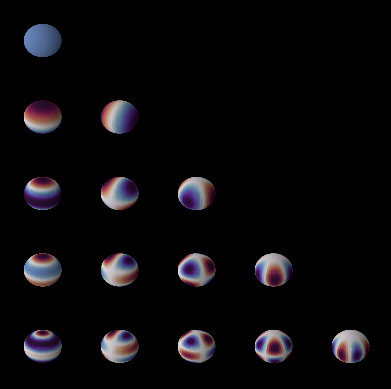

In [273]:
#Visualizing the Spherical Harmonics Yml(θ,φ) (m,n)
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

#Defining coordinate system
N = 50
theta_viz = np.linspace(0, np.pi, N)
phi_viz = np.linspace(0, 2*np.pi, N)
theta_viz, phi_viz = np.meshgrid(theta_viz, phi_viz)

# transforming spherical coordinates to Cartesian coordinates 
x_viz = np.sin(theta_viz) * np.cos(phi_viz)
y_viz = np.sin(theta_viz) * np.sin(phi_viz)
z_viz = np.cos(theta_viz)

#plotting
fig = plt.figure(figsize=plt.figaspect(1.))
fig.patch.set_facecolor('#000000')

l_max = 5

for i in range(l_max): #i -> l, j-> m
    for j in range(i+1):
        # Calculate the spherical harmonic and normalize to [0,1]
        Yvals = sph_harm(j, i, phi_viz, theta_viz).real
        fmax, fmin = Yvals.max(), Yvals.min()
        if i>0:
            Yvals = (Yvals - fmin)/(fmax - fmin)

        ax = fig.add_subplot(5,5,((i*5) + j+1), projection='3d')
        ax.plot_surface(x_viz, y_viz, z_viz,  rstride=1, cstride=1, facecolors=cm.twilight_shifted(Yvals))
        # Turn off the axis planes
        ax.set_axis_off()

plt.show()


In [280]:
plt.style.use("default")

In [275]:
#Defining The Normalized Angular Equation Function
def angular_function(m, l, theta, phi):
    legendre = sp.lpmv(m, l, np.cos(theta))

    return ((-1) ** m) * np.sqrt(
        ((2 * l + 1) * np.math.factorial(l - np.abs(m)))
        / (4 * np.pi * np.math.factorial(l + np.abs(m)))) * legendre * np.real(np.exp(1.j * m * phi))

## The Normalized Wavefunction

Finally, The Normalized Wavefunction for the Hydrogen Atom, solved for a Coloumb potential, is given by:

\begin{equation}
\psi_{n \ell m}(r, \theta, \varphi)=\sqrt{\left(\frac{2}{n a_0^*}\right)^3 \frac{(n-\ell-1) !}{2 n(n+\ell) !}} e^{-\rho / 2} \rho^{\ell} L_{n-\ell-1}^{2 \ell+1}(\rho) Y_{\ell}^m(\theta, \varphi)
\end{equation}

In [276]:
#The Normalized Wavefunction
# by definition of quantum numbers n, l, m and a bohr radius augmentation coefficient

def normalized_wavefunction(n, l, m, a0):

    # Bohr radius (a0) augmentation 
    a0 = 5.29e-11 * (1e+12 * a0)
    
    # Set coordinates grid to assign a certain probability to each point (x, y) in the plane
    x = y = np.linspace(-480, 480, 680)
    x, y = np.meshgrid(x, y)

    # Ψnlm(r,θ,φ) = Rnl(r).Ylm(θ,φ)
    psi = radial_function(n, l, np.sqrt((x ** 2 + y ** 2)), a0) * angular_function(m, l, np.arctan(x / (y + 1e-10)), 0)

    return np.abs(psi) ** 2

## The Hydrogen Atom - Probaility Density Plots

\begin{equation}
\int_{\Delta V}\left|\psi_{n l m}(r, \theta, \phi)\right|^2 d V=\int_{r_1}^{r_2} \int_{\theta_1}^{\theta_2} \int_{\phi_1}^{\phi_2}\left|\psi_{n l m}(r, \theta, \phi)\right|^2 r^2 \sin \theta d r d \theta d \phi
\end{equation}

In [320]:
# Solving the normalized wavefunction and plotting its electron probability density 
def plot_wavefunction(n, l, m, a0):
    
    fig, ax = plt.subplots()
    
    # Plot probability density figure
    im = ax.imshow(np.sqrt(normalized_wavefunction(n, l, m, a0)), cmap='rocket')
    
    # Add colorbar
    cbar = plt.colorbar(im, fraction=0.046, pad=0.03)
    cbar.set_ticks([])
    
    # Adjusting plot parameters
    fig.patch.set_facecolor('#020419'); cbar.outline.set_visible(False)
    plt.rcParams['text.color']='#dfdfdf'; ax.tick_params(axis='x', colors='#c4c4c4')
    ax.tick_params(axis='y', colors='#c4c4c4')

    ax.spines['top'].set_color('#020419'); ax.spines['right'].set_color('#020419')
    ax.spines['bottom'].set_color('#c4c4c4'); ax.spines['left'].set_color('#c4c4c4')
    ax.set_title('Hydrogen Wavefunction probability density', pad=20, fontsize=15, color='#dfdfdf')    
    
    # Add text and labels
    ax.invert_yaxis() 
    ax.text(40, 630, r'$\psi_{{({0}, {1}, {2})}}$'.format(n, l, m), color='#dfdfdf', fontsize=18)
    ax.text(780, 140, 'Particle probability distribution', rotation='vertical', fontsize=13)
    ax.text(780, 660, '+', fontsize=16)
    ax.text(780, 0, '−', fontsize=16)

    # Save and display plot
    #plt.savefig(f'wavefunction ({n},{l},{m}).png', dpi=245, bbox_inches='tight', pad_inches=0.3)
    
    return ax

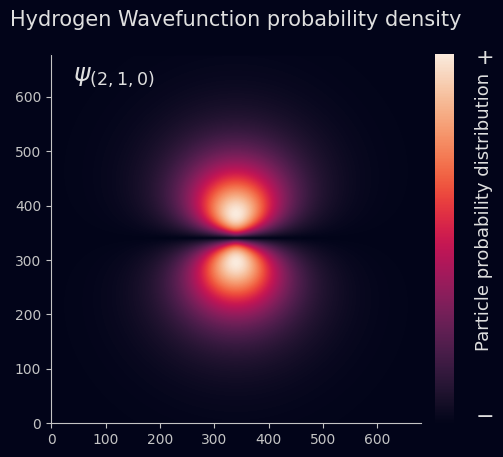

In [321]:
# example plot
ax = plot_wavefunction(2, 1, 0, 0.6)

<Axes: title={'center': 'Hydrogen Wavefunction probability density'}>

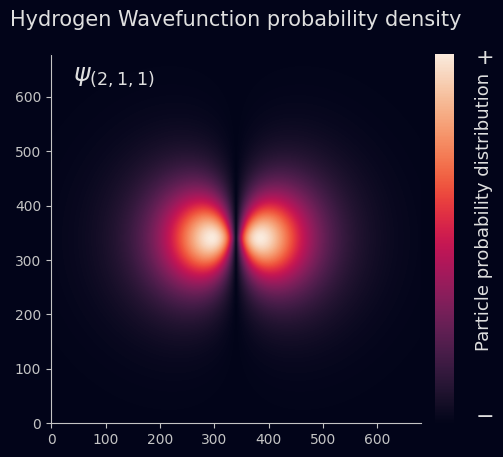

In [322]:
plot_wavefunction(2, 1, 1, 0.6)

<Axes: title={'center': 'Hydrogen Wavefunction probability density'}>

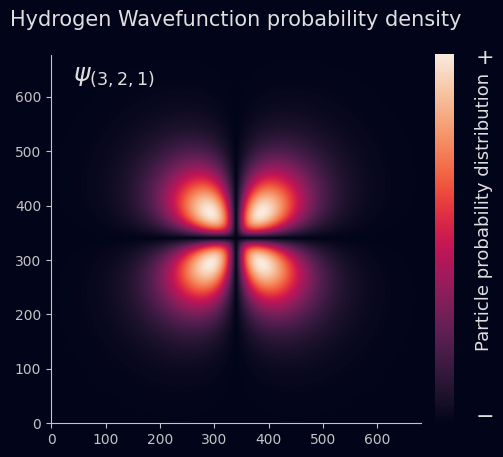

In [323]:
plot_wavefunction(3, 2, 1, 0.3)

<Axes: title={'center': 'Hydrogen Wavefunction probability density'}>

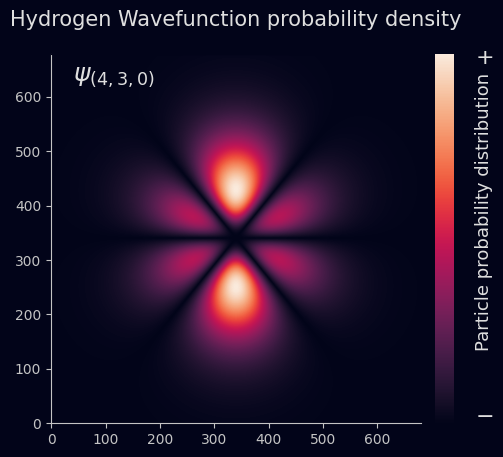

In [324]:
plot_wavefunction(4, 3, 0, 0.2)

<Axes: title={'center': 'Hydrogen Wavefunction probability density'}>

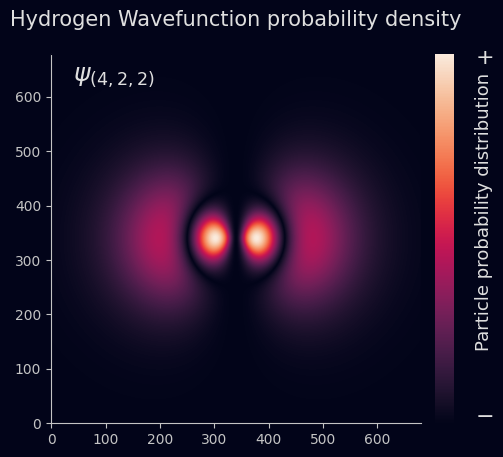

In [325]:
plot_wavefunction(4, 2, 2, 0.2)

<Axes: title={'center': 'Hydrogen Wavefunction probability density'}>

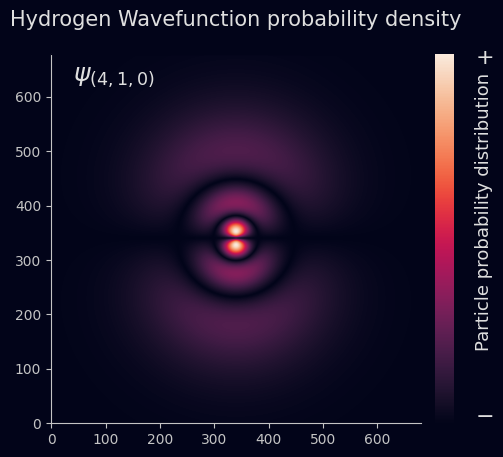

In [326]:
plot_wavefunction(4, 1, 0, 0.2)

<Axes: title={'center': 'Hydrogen Wavefunction probability density'}>

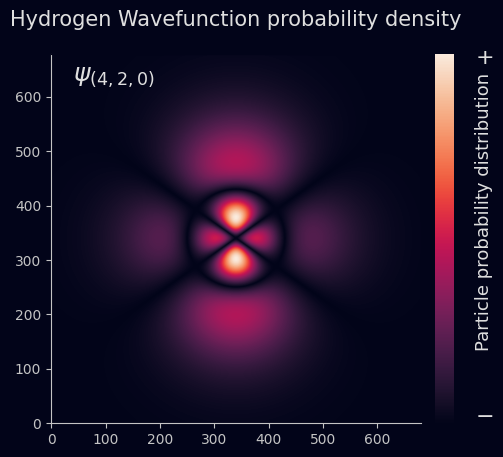

In [327]:
plot_wavefunction(4, 2, 0, 0.2)